In [41]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Use Kmeans on principal components

In [42]:
# Using principal components (train 1)
data = pd.read_csv("../train1.csv", header=0, index_col=0)
data.head(5)

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10,price
0,111.257356,-19.034748,4.862769,5.177924,4.656782,-1.921391,-0.183095,-0.501683,0.228178,0.155032,-0.045540,42.0
1,83.044684,-16.618402,-1.045081,-27.007275,1.369359,-1.257543,1.601341,-0.070470,0.348136,0.057967,-0.059666,70.0
2,-40.735853,-16.486288,8.230134,2.939946,-0.154164,3.420576,-1.148351,0.267577,-0.051632,0.067243,-0.002725,120.0
3,52.478668,-20.196244,19.246323,40.140551,6.309285,2.801438,-0.923490,0.266367,-0.188993,0.018491,0.047119,120.0
4,-2.510515,-18.811422,-2.803176,16.615282,-20.676484,2.069589,-0.209310,0.216395,-0.523536,-0.190009,0.008872,120.0


In [43]:
airbnb_temp = data.copy()

In [44]:
## get price with tag low, med, high
low_indexes = airbnb_temp[airbnb_temp.price < 75].index
med_indexes = airbnb_temp[(airbnb_temp.price >= 75) &
                         (airbnb_temp.price < 150)].index
high_indexes = airbnb_temp[(airbnb_temp.price >= 150)].index

In [45]:
airbnb_temp.loc[low_indexes, 'price_category'] = 'low'
airbnb_temp.loc[med_indexes, 'price_category'] = 'medium'
airbnb_temp.loc[high_indexes, 'price_category'] = 'high'
airbnb_temp.head(5)

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10,price,price_category
0,111.257356,-19.034748,4.862769,5.177924,4.656782,-1.921391,-0.183095,-0.501683,0.228178,0.155032,-0.045540,42.0,low
1,83.044684,-16.618402,-1.045081,-27.007275,1.369359,-1.257543,1.601341,-0.070470,0.348136,0.057967,-0.059666,70.0,low
2,-40.735853,-16.486288,8.230134,2.939946,-0.154164,3.420576,-1.148351,0.267577,-0.051632,0.067243,-0.002725,120.0,medium
3,52.478668,-20.196244,19.246323,40.140551,6.309285,2.801438,-0.923490,0.266367,-0.188993,0.018491,0.047119,120.0,medium
4,-2.510515,-18.811422,-2.803176,16.615282,-20.676484,2.069589,-0.209310,0.216395,-0.523536,-0.190009,0.008872,120.0,medium


In [46]:
airbnb_temp.price_category.value_counts()

medium    14348
low       11121
high       8666
Name: price_category, dtype: int64

In [47]:
# drop price
X = airbnb_temp.drop('price', axis=1)
X = X.drop("price_category", axis = 1)
X.head(5)

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10
0,111.257356,-19.034748,4.862769,5.177924,4.656782,-1.921391,-0.183095,-0.501683,0.228178,0.155032,-0.045540
1,83.044684,-16.618402,-1.045081,-27.007275,1.369359,-1.257543,1.601341,-0.070470,0.348136,0.057967,-0.059666
2,-40.735853,-16.486288,8.230134,2.939946,-0.154164,3.420576,-1.148351,0.267577,-0.051632,0.067243,-0.002725
3,52.478668,-20.196244,19.246323,40.140551,6.309285,2.801438,-0.923490,0.266367,-0.188993,0.018491,0.047119
4,-2.510515,-18.811422,-2.803176,16.615282,-20.676484,2.069589,-0.209310,0.216395,-0.523536,-0.190009,0.008872


In [49]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_ # sum of squared distances to the closest cluster centers

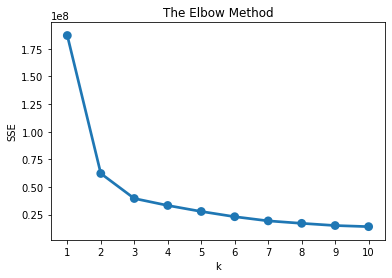

In [50]:
# plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### elbow method: using k value at 3

In [51]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=1)

In [52]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

KMeans(n_clusters=3, n_jobs=None, precompute_distances='auto', random_state=1)

In [53]:
# get the labels
cluster_labels = kmeans.labels_

# assign these clusters back into the dataframe
data_with_clusters = airbnb_temp.assign(cluster=cluster_labels)

# display the shape
data_with_clusters.shape

(34135, 14)

In [54]:
data_with_clusters.cluster.value_counts()

0    12635
1    11031
2    10469
Name: cluster, dtype: int64

In [55]:
data_with_clusters.head(5)

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,pca_component 10,price,price_category,cluster
0,111.257356,-19.034748,4.862769,5.177924,4.656782,-1.921391,-0.183095,-0.501683,0.228178,0.155032,-0.045540,42.0,low,2
1,83.044684,-16.618402,-1.045081,-27.007275,1.369359,-1.257543,1.601341,-0.070470,0.348136,0.057967,-0.059666,70.0,low,2
2,-40.735853,-16.486288,8.230134,2.939946,-0.154164,3.420576,-1.148351,0.267577,-0.051632,0.067243,-0.002725,120.0,medium,0
3,52.478668,-20.196244,19.246323,40.140551,6.309285,2.801438,-0.923490,0.266367,-0.188993,0.018491,0.047119,120.0,medium,2
4,-2.510515,-18.811422,-2.803176,16.615282,-20.676484,2.069589,-0.209310,0.216395,-0.523536,-0.190009,0.008872,120.0,medium,1


In [56]:
data_with_clusters.to_csv("train1_clustered.csv", header=True, index=True)